In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Script to better visualize and develop the lagrangian interpolation for the vertical remap,
#Manuel Valera, NCAR, 6/22/17

data = !awk -F" " '{print $1}' ao_extrap.dat
for i in range(len(data)):
    data[i] = float(data[i])

print data,len(data)

[4336775.821474351, 3858348.982681448, 622496.5652039512, 478426.8387929024, 439362.68355264235, 410291.69839796843, 370181.2196616858, 338195.7737485193, 313735.3773780478, 299559.9829180899, 294239.61234165897, 291859.23068598175, 289943.38953026733, 285633.3203605299, 281470.3102495229, 276079.4562393719, 272711.75981269864, 269856.06242030574, 263307.3252635, 256685.88123470638, 249543.31334398797, 241695.04033728762, 234990.88920381543, 229322.60228222786, 226106.04254704822, 222799.79748305422, 219545.12598006128, 218308.29652250774, 217470.13540902396, 216690.7585028237, 216136.86626046748, 215845.1434190883, 215845.1434190883, 216136.86626046748] 34


In [4]:
pio = !awk -F" " '{print $1}' pio_extrap.dat
for i in range(len(pio)):
    pio[i] = float(pio[i])

print pio,len(pio)

[-8.329500675201416, -4.164750337600708, 0.0, 3.9514000415802, 6.761650085449219, 10.255500316619873, 13.656000137329102, 16.327000617980957, 17.4169979095459, 15.809000015258789, 15.494503021240234, 18.229496002197266, 21.449996948242188, 25.230003356933594, 29.68000030517578, 34.91999816894531, 41.084999084472656, 48.334999084472656, 56.86000061035156, 66.88999938964844, 78.68998718261719, 85.09001159667969, 81.61502075195312, 72.01498413085938, 57.449981689453125, 38.67999267578125, 27.485015869140625, 25.620025634765625, 23.55499267578125, 21.28997802734375, 18.839996337890625, 16.230010986328125, 7.94500732421875, 0.0] 34


[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]


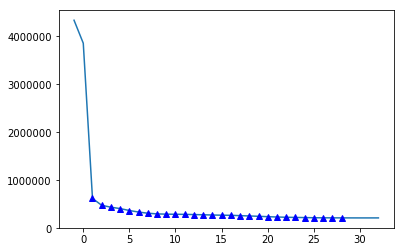

In [5]:
#Visualizing, triangles are inside points, outer line is extrapolation (results from 6/21/17)
ind = np.arange(-1,33)
print ind
plt.plot(ind,data,ind[2:30],data[2:30],'b^')
plt.show()

31 [0, 1] 34


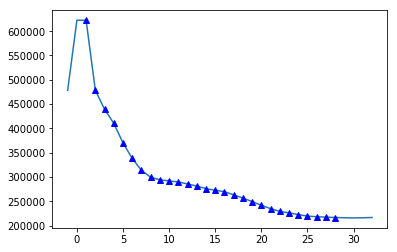

In [8]:
#Mirrored interpolation:

gs =2 
nlev = len(data)-3
print nlev, range(gs),len(data)


#for k in range(gs):
data[1] = data[2]
data[0] = data[3]
data[nlev+1] = data[nlev-1]
data[nlev+2] = data[nlev-2]



plt.plot(ind,data,ind[2:30],data[2:30],'b^')
plt.show()    

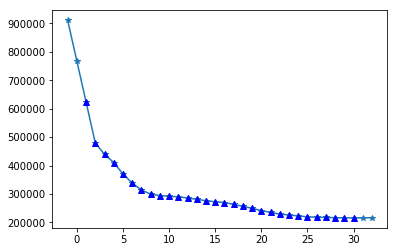

In [9]:
#Linear interpolation:
# Y_k+1 = Y_k-1 + (X_k+1 - X_K-1)/(X_k - X_k-1)*(Y_k - Y_k-1)

data[1] = data[3] + ( 1 - 3)/(2 - 3)*(data[2]-data[3])
data[0] = data[2] + ( 0 - 2)/(1 - 2)*(data[1]-data[2])


plt.plot(ind,data,'-*',ind[2:32],data[2:32],'b^')
plt.show()  

(50, 10) P(50)= 10.0
[-2.7135714285714285, 0.0, 2.58, 5.028571428571428, 7.347857142857141, 9.540000000000001, 11.607142857142858, 13.551428571428573, 15.375000000000002, 17.08, 18.668571428571425, 20.14285714285715]
[0, 25, 50, 57]
[0, 30, 10, 0]


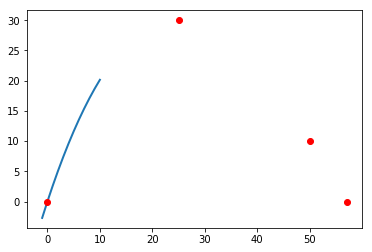

In [16]:
import sys
#from https://gist.githubusercontent.com/melpomene/2482930/raw/a245f9ed0cea7204feb57f1da3e25c4bf4eb72ad/lagrange.py
def lagrange(points):
	def P(x):
		total = 0
		n = len(points)
		for i in xrange(n):
			xi, yi = points[i]
			
			def g(i, n):
				
				tot_mul = 1
				for j in xrange(n):
					if i == j:
						continue
					xj, yj = points[j]
					tot_mul *= (x - xj) / float(xi - xj)
					
				return tot_mul 

			total += yi * g(i, n)
		return total
	return P 

def plot(f, points):
	x = range(-1, 11)
	y = map(f, x)
	print y
	plt.plot( x, y, linewidth=2.0)
	x_list = []
	y_list = []
	for x_p, y_p in points:
		x_list.append(x_p)
		y_list.append(y_p)
	print x_list
	print y_list
	plt.plot(x_list, y_list,  'ro')

	plt.show()

    
    
#points = []
points =[(0,0),(25,30),(50,10), (57,0)]
P = lagrange(points)
nr = 2
print "(" + str(points[nr][0]) + ", " + str(points[nr][1]) +") P(" + str(points[nr][0]) +")= " +str(P(points[nr][0]))
plot(P, points)

In [11]:
def P(x):
    total = 0
    for k in xrange(len(data)):
        lag[k] = 1.0
        for j in xrange(len(data)):
            if(k!=j):
                lag[j] = lag[j]*(x - j)/float(k - j)
        total = total + lag[k]*data[k] 
    return total
    return P

def plot(f, points):
	x = range(-1, 11)
	y = map(f, x)
	print y
	plt.plot( x, y, linewidth=2.0)
	x_list = []
	y_list = []
	for x_p, y_p in points:
		x_list.append(x_p)
		y_list.append(y_p)
	print x_list
	print y_list
	plt.plot(x_list, y_list,  'ro')

	plt.show()


(5, 410291.698398) P(5)= 410291.698398
[1413107.481921452, 1036386.8305166074, 766566.291615, 586346.1870844812, 478426.8387929024, 425508.5686081143, 410291.69839796843, 415476.5500303157, 423763.4453730071, 417852.7062938941, 380444.65466082783, 294239.61234165897]
[1, 3, 5, 10]
[766566.291615, 478426.8387929024, 410291.69839796843, 294239.61234165897]


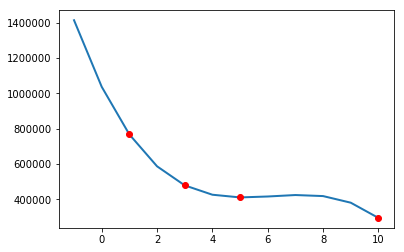

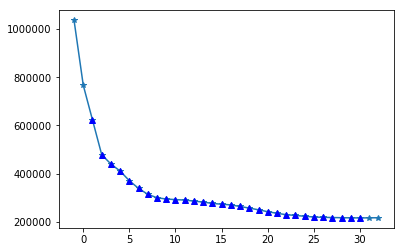

In [17]:
#Lagrange interpolation:

#


points =[(1,data[1]),(3,data[3]),(5,data[5]), (10,data[10])]
P = lagrange(points)
nr = 2
print "(" + str(points[nr][0]) + ", " + str(points[nr][1]) +") P(" + str(points[nr][0]) +")= " +str(P(points[nr][0]))
plot(P, points)

#polyl = np.zeros(len(data))
#for i in polyl:
#    polyl[i] = P(i)  
#print polyl    

data[0] = P(0)
data[1] = P(1)

"""
x = 0
lag = np.ones(len(data))
total = 0
polyl = np.zeros(len(data))

for k in range(len(data)):
    lag[k] = 1.0
    for j in xrange(len(data)):
        if(k!=j):
            lag[j] = lag[j]*(x - j)/float(k - j)
    total = total + lag[k]*data[k] 
    polyl[k] = total

data[0] = polyl[0]
"""
    
plt.plot(ind,data,'-*',ind[2:32],data[2:32],'b^')
plt.show()      
    
    
